# Notebook 2 - Data Exploration

**Author:** Kavan Wills

**Computing ID:** meu5cg

**Course:** DS 2023 - Communicating with Data  

---
## Purpose
Explore lyrical complexity trends through preliminary visualizations and experimentation with different plot types.

In this notebook I focus on four lyric–complexity features—

- `Number of Words`
- `Number of Unique Words`
- `Unique Word Ratio`
- `Number of Syllables`

because my project question is about how vocabulary and repetition in lyrics have changed over time.


--- 
## Contents
1. Load data
2. Data preparation
3. Single feature visualizations
4. Multiple feature visualizations
5. Data transformations for different plot types
6. Experiment with plot variations


---
## Import Libraries & Load Data

In [108]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Recreate df_clean with Decade column
df = pd.read_csv('bimmuda_per_song_full.csv')
df_clean = df[df['Number of Words'] > 0].copy()
df_clean['Decade'] = (df_clean['Year'] // 10) * 10

In [123]:
total_songs = len(df)
missing_words = df["Number of Words"].isna().sum()
zero_words = (df["Number of Words"] == 0).sum()
valid_lyric_songs = df["Number of Words"].gt(0).sum()

print(f"Total entries in BiMMuDa per-song dataset: {total_songs}")
print(f"Songs with missing word counts: {missing_words}")
print(f"Songs with zero words: {zero_words}")
print(f"Songs included in lyric analysis (Number of Words > 0): {valid_lyric_songs}")

Total entries in BiMMuDa per-song dataset: 379
Songs with missing word counts: 14
Songs with zero words: 0
Songs included in lyric analysis (Number of Words > 0): 365


In [110]:
df_clean = df[df["Number of Words"].gt(0)].copy()

df_clean.shape

(365, 19)

In [111]:
df_clean["Decade"] = (df_clean["Year"] // 10) * 10

df_clean[["Year", "Decade"]].head()

,Year,Decade
0,1950,1950
1,1950,1950
3,1950,1950
4,1950,1950
5,1951,1950


For this analysis I focus on `df_clean`, the subset of songs with positive word
counts (Number of Words > 0). In the per-song BiMMuDa CSV I use, there are 379 rows representing 371 unique songs. Fourteen entries have missing lyric word counts, so my lyric complexity analysis covers the 365 entries (357 unique songs) with valid lyrics.

---
## Single Feature Exploration - Unique Word Ratio

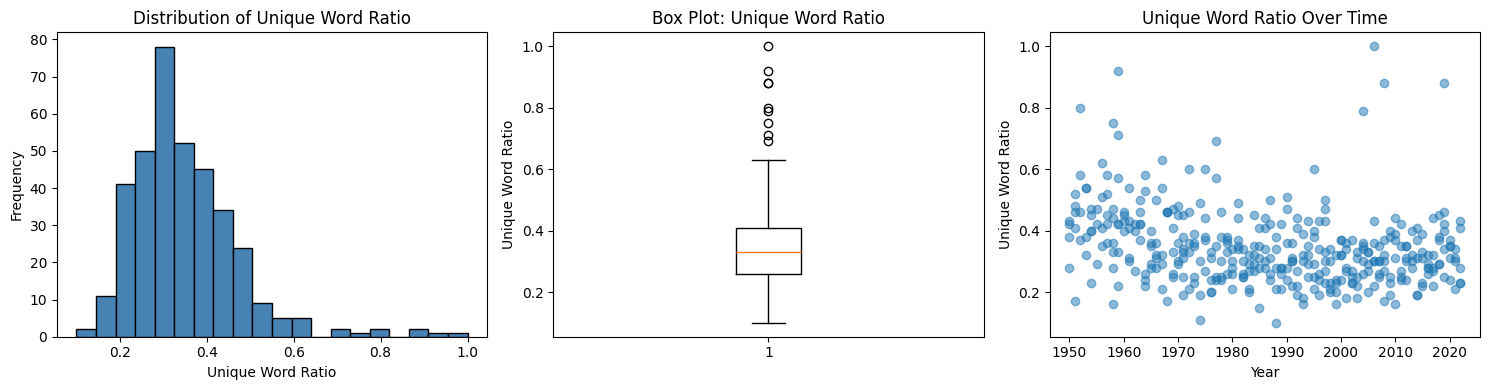

In [112]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

# Histogram
axes[0].hist(df_clean['Unique Word Ratio'], bins=20, color='steelblue', edgecolor='black')
axes[0].set_title('Distribution of Unique Word Ratio')
axes[0].set_xlabel('Unique Word Ratio')
axes[0].set_ylabel('Frequency')

# Box plot
axes[1].boxplot(df_clean['Unique Word Ratio'])
axes[1].set_title('Box Plot: Unique Word Ratio')
axes[1].set_ylabel('Unique Word Ratio')

# Time series
axes[2].plot(df_clean['Year'], df_clean['Unique Word Ratio'], 'o', alpha=0.5)
axes[2].set_title('Unique Word Ratio Over Time')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Unique Word Ratio')

plt.tight_layout()
plt.savefig('single_feature_exploration.png', dpi=300, bbox_inches='tight')
plt.show()

**Observation:** The distribution shows most songs cluster between 0.2-0.4 ratio, with the box plot revealing several outliers above 0.6. The time series plot demonstrates a clear declining trend from higher diversity in early decades to lower diversity in recent decades, with increased scatter in the data over time.

---
## Single Feature Exploration - Number of Words

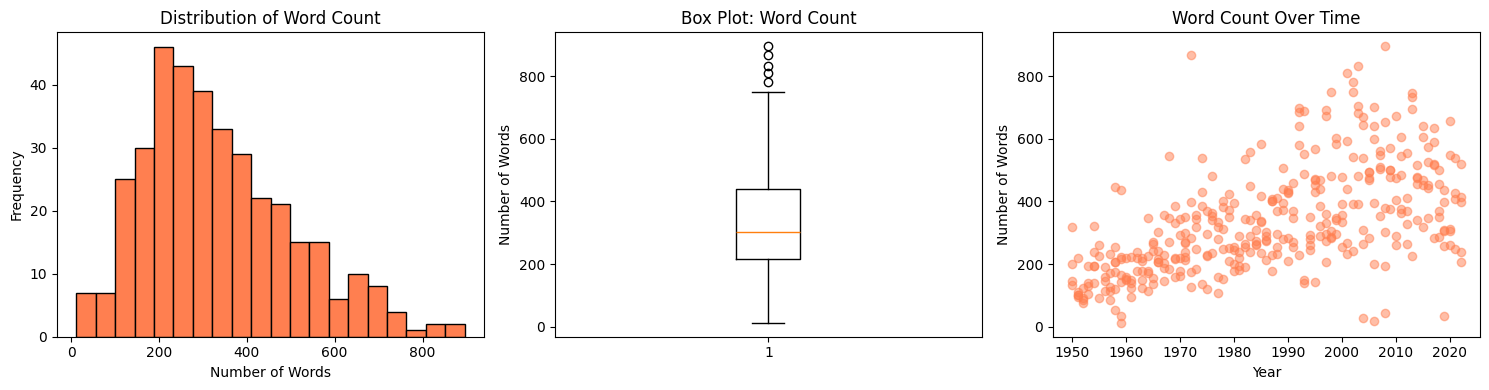

In [113]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Histogram
axes[0].hist(df_clean['Number of Words'], bins=20, color='coral', edgecolor='black')
axes[0].set_title('Distribution of Word Count')
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Frequency')

# Box plot
axes[1].boxplot(df_clean['Number of Words'])
axes[1].set_title('Box Plot: Word Count')
axes[1].set_ylabel('Number of Words')

# Time series
axes[2].plot(df_clean['Year'], df_clean['Number of Words'], 'o', alpha=0.5, color='coral')
axes[2].set_title('Word Count Over Time')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Number of Words')

plt.tight_layout()
plt.savefig('words_exploration.png', dpi=300, bbox_inches='tight')
plt.show()

**Observation:** The histogram shows a right-skewed distribution with most songs under 400 words but a long tail extending past 800 words. The time series reveals both an upward trend and dramatically increasing variability over time, with recent decades showing the widest spread from shortest to longest songs.

---
## Single Feature Exploration - Number of Unique Words

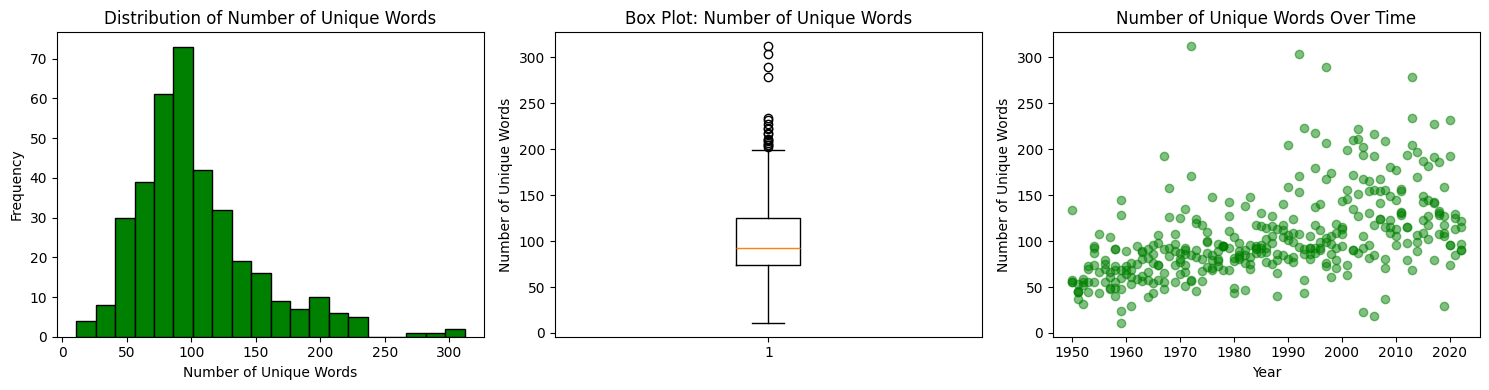

In [114]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Histogram
axes[0].hist(df_clean['Number of Unique Words'], bins=20, color='green', edgecolor='black')
axes[0].set_title('Distribution of Number of Unique Words')
axes[0].set_xlabel('Number of Unique Words')
axes[0].set_ylabel('Frequency')

# Box plot
axes[1].boxplot(df_clean['Number of Unique Words'])
axes[1].set_title('Box Plot: Number of Unique Words')
axes[1].set_ylabel('Number of Unique Words')

# Time series
axes[2].plot(df_clean['Year'], df_clean['Number of Unique Words'], 'o', alpha=0.5, color='green')
axes[2].set_title('Number of Unique Words Over Time')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Number of Unique Words')

plt.tight_layout()
plt.savefig('feature3_unique_words.png', dpi=300, bbox_inches='tight')
plt.show()

**Observation:** Unique vocabulary shows a modest upward trend over time, but the increase is much less dramatic than total word count. The distribution remains relatively concentrated around 100-150 unique words across all decades, though recent years show more high-vocabulary outliers.

---
## Single Feature Exploration - Number of Syllables

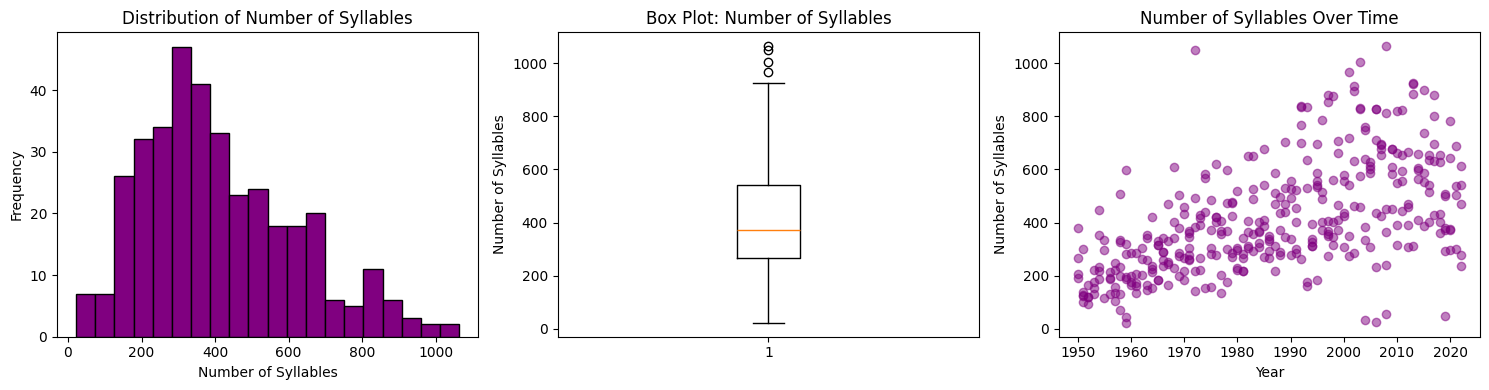

In [115]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Histogram
axes[0].hist(df_clean['Number of Syllables'], bins=20, color='purple', edgecolor='black')
axes[0].set_title('Distribution of Number of Syllables')
axes[0].set_xlabel('Number of Syllables')
axes[0].set_ylabel('Frequency')

# Box plot
axes[1].boxplot(df_clean['Number of Syllables'])
axes[1].set_title('Box Plot: Number of Syllables')
axes[1].set_ylabel('Number of Syllables')

# Time series
axes[2].plot(df_clean['Year'], df_clean['Number of Syllables'], 'o', alpha=0.5, color='purple')
axes[2].set_title('Number of Syllables Over Time')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Number of Syllables')

plt.tight_layout()
plt.savefig('feature4_syllables.png', dpi=300, bbox_inches='tight')
plt.show()

**Observation:** Syllable count closely mirrors the word count pattern, showing similar upward trend and increasing variability. This parallel relationship suggests that average word complexity (syllables per word) has remained relatively stable despite songs getting longer.

---
## Multiple Features - Scatter Plot

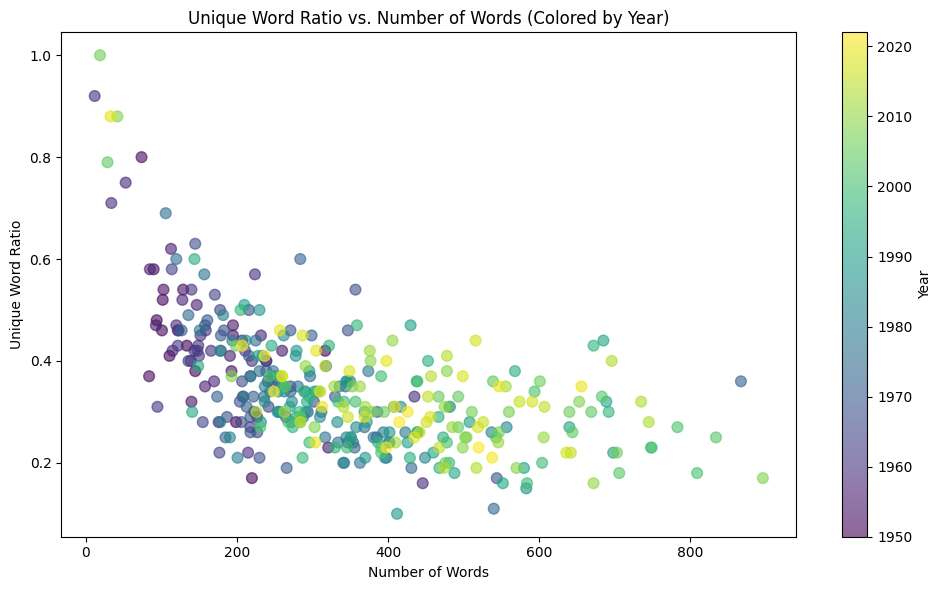

In [116]:
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(df_clean['Number of Words'], 
                     df_clean['Unique Word Ratio'],
                     c=df_clean['Year'], 
                     cmap='viridis', 
                     alpha=0.6,
                     s=60)

plt.colorbar(scatter, label='Year')
ax.set_xlabel('Number of Words')
ax.set_ylabel('Unique Word Ratio')
ax.set_title('Unique Word Ratio vs. Number of Words (Colored by Year)')

plt.tight_layout()
plt.savefig('scatter_words_diversity.png', dpi=300, bbox_inches='tight')
plt.show()

**Observation:** The scatter plot reveals a negative relationship between song length and vocabulary diversity. The color gradient shows older songs (purple) concentrated in the lower-left with high diversity ratios, while newer songs (yellow/green) spread toward the upper-right with lower diversity ratios despite higher word counts.

---
## Multiple Features - Grouped by Decade

In [117]:
# Calculate averages by decade
decade_avg = df_clean.groupby('Decade').agg({
    'Number of Words': 'mean',
    'Number of Unique Words': 'mean',
    'Unique Word Ratio': 'mean'
}).reset_index()

print("Average metrics by decade:")
print(decade_avg)

Average metrics by decade:
   Decade  Number of Words  Number of Unique Words  Unique Word Ratio
0    1950       167.937500               65.666667           0.443125
1    1960       216.869565               78.847826           0.381087
2    1970       297.313725               94.568627           0.343725
3    1980       315.220000               92.840000           0.310200
4    1990       402.132075              118.905660           0.309811
5    2000       463.264151              131.415094           0.327170
6    2010       442.960000              137.680000           0.329800
7    2020       391.357143              118.285714           0.311429


---
## Experiment - Line Plot (Trends by Decade)

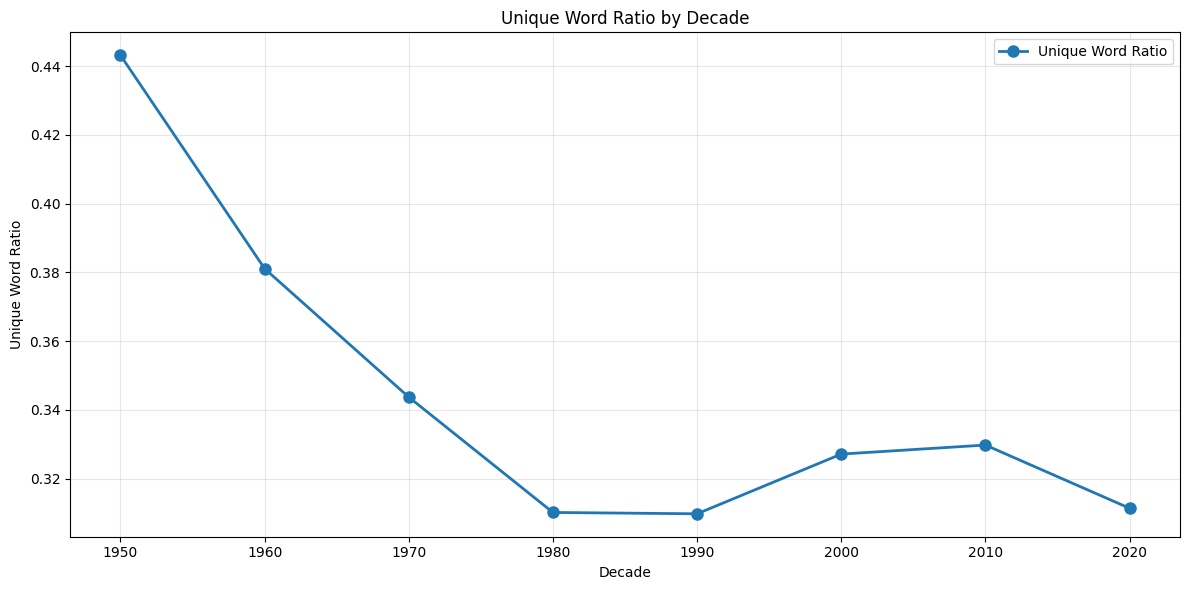

In [118]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(decade_avg['Decade'], decade_avg['Unique Word Ratio'], 
        marker='o', linewidth=2, markersize=8, label='Unique Word Ratio')

ax.set_xlabel('Decade')
ax.set_ylabel('Unique Word Ratio')
ax.set_title('Unique Word Ratio by Decade')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('decade_trend_line.png', dpi=300, bbox_inches='tight')
plt.show()

**Observation:** The line plot shows a two-phase pattern: a sharp decline from 1950 to 1980, followed by stabilization around the same level from 1980 onward. This suggests vocabulary diversity dropped significantly in the early decades, then plateaued at a consistently lower level in modern music.

---
## Experiment - Bar Chart (Decade Comparison)

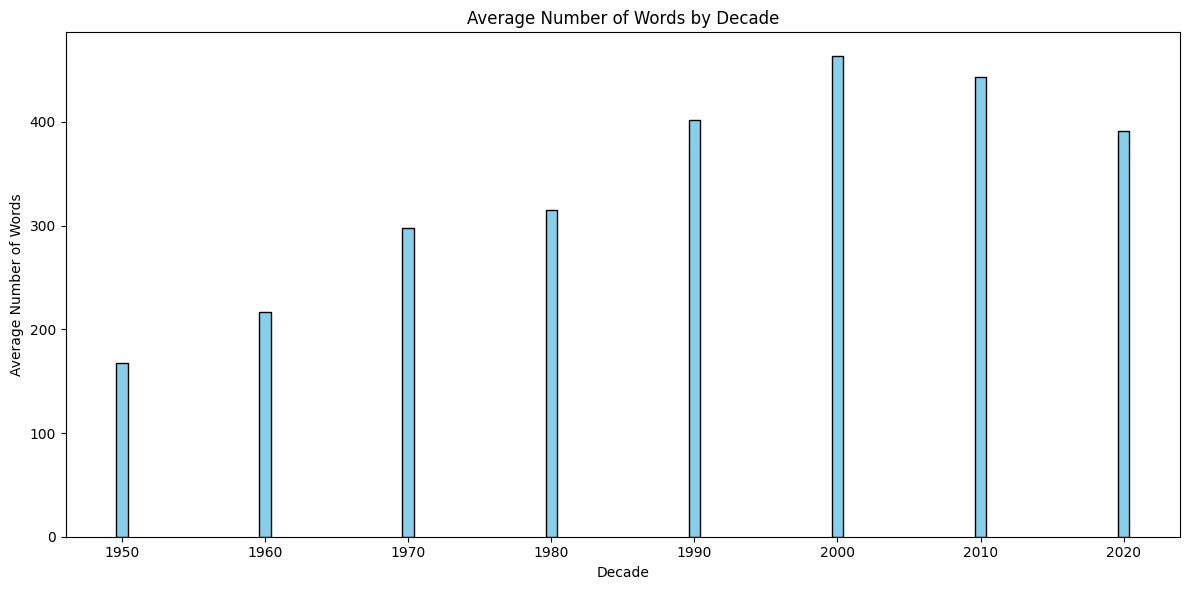

In [119]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(decade_avg['Decade'], decade_avg['Number of Words'], 
       color='skyblue', edgecolor='black')

ax.set_xlabel('Decade')
ax.set_ylabel('Average Number of Words')
ax.set_title('Average Number of Words by Decade')

plt.tight_layout()
plt.savefig('decade_bar.png', dpi=300, bbox_inches='tight')
plt.show()

**Observation:** The bar chart shows progressive increases in average song length from the 1950s through 2010, with the 2000s and 2010s representing the peak. The 2020s show a slight decline from this peak, potentially reflecting recent trends toward shorter, more streaming-optimized song formats.

---
## Experiment - Box Plots by Decade

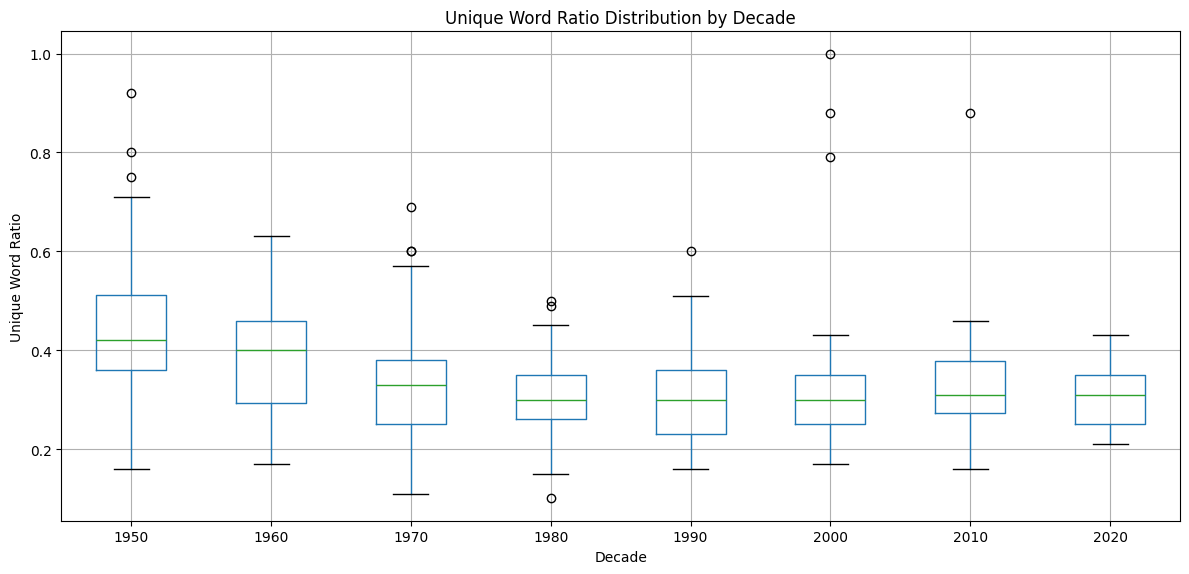

In [120]:
fig, ax = plt.subplots(figsize=(12, 6))

df_clean.boxplot(column='Unique Word Ratio', by='Decade', ax=ax)
ax.set_xlabel('Decade')
ax.set_ylabel('Unique Word Ratio')
ax.set_title('Unique Word Ratio Distribution by Decade')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.savefig('decade_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

**Observation:** The box plots reveal declining median diversity from the 1950s through 1980s, then stable medians across later decades. Notably, while the 1950s show the widest distribution suggesting varied songwriting approaches, later decades show tighter clustering around lower values, indicating industry-wide standardization of repetitive structures.

---
## Data Transformation - Wide Table for Heatmap

In [121]:
# Transform data: Create pivot table for heatmap
# Average metrics by decade

heatmap_data = df_clean.groupby('Decade').agg({
    'Number of Words': 'mean',
    'Number of Unique Words': 'mean',
    'Unique Word Ratio': 'mean',
    'Number of Syllables': 'mean',
    'Number of Parts': 'mean'
}).T  # Transpose so decades are columns

print("Transformed data for heatmap:")
print(heatmap_data)

Transformed data for heatmap:
Decade                        1950        1960        1970      1980  \
Number of Words         167.937500  216.869565  297.313725  315.2200   
Number of Unique Words   65.666667   78.847826   94.568627   92.8400   
Unique Word Ratio         0.443125    0.381087    0.343725    0.3102   
Number of Syllables     213.125000  271.347826  363.549020  386.6000   
Number of Parts           2.437500    2.434783    3.019608    3.0400   

Decade                        1990        2000        2010        2020  
Number of Words         402.132075  463.264151  442.960000  391.357143  
Number of Unique Words  118.905660  131.415094  137.680000  118.285714  
Unique Word Ratio         0.309811    0.327170    0.329800    0.311429  
Number of Syllables     487.490566  563.339623  557.940000  473.857143  
Number of Parts           3.122449    3.735849    3.591837    3.857143  


---
## Heatmap Visualization

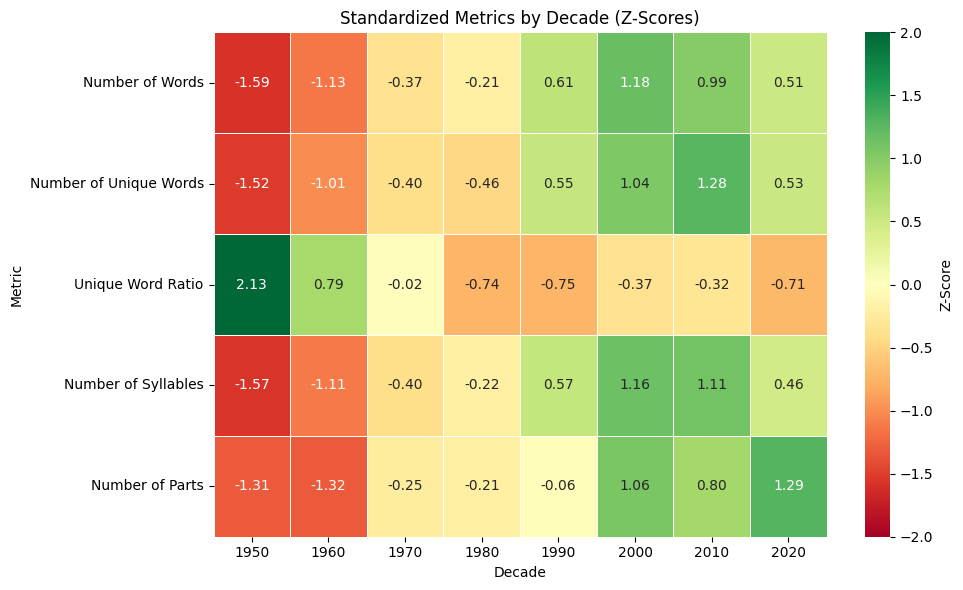

Z-Score Interpretation:
• Dark Red (+2) = Much higher than average for that metric
• White (0) = Average for that metric
• Dark Green (-2) = Much lower than average for that metric


In [122]:
# Calculate averages by decade
heatmap_data = df_clean.groupby('Decade').agg({
    'Number of Words': 'mean',
    'Number of Unique Words': 'mean',
    'Unique Word Ratio': 'mean',
    'Number of Syllables': 'mean',
    'Number of Parts': 'mean'
}).T  # Transpose so decades are columns

heatmap_normalized = heatmap_data.apply(
    lambda row: (row - row.mean()) / row.std(), 
    axis=1
)

# Plot normalized heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_normalized, annot=True, fmt='.2f', cmap='RdYlGn',
            linewidths=0.5, ax=ax, center=0, vmin=-2, vmax=2,
            cbar_kws={'label': 'Z-Score'})
ax.set_title('Standardized Metrics by Decade (Z-Scores)')
ax.set_xlabel('Decade')
ax.set_ylabel('Metric')
plt.tight_layout()
plt.savefig('decade_heatmap_normalized.png', dpi=300, bbox_inches='tight')
plt.show()

print("Z-Score Interpretation:")
print("• Dark Red (+2) = Much higher than average for that metric")
print("• White (0) = Average for that metric")
print("• Dark Green (-2) = Much lower than average for that metric")

**Observation:** Colors show how each decade compares to the average for that metric. 

- Unique Word Ratio (row 3): Green in 1950s → Orange in 2020s
  (Diversity DECREASED over time)
  
- Number of Words (row 1): Red in 1950s → Green in 2000s
  (Word count INCREASED over time)


---
## Plot Type Justification

This notebook uses various plot types appropriate to the data:

**For numeric features (word counts, ratios, syllables):**
- Histograms → show distribution shapes
- Box plots → reveal quartiles and outliers
- Scatter plots → show relationships between two variables

**For temporal data (Year as independent variable):**
- Line plots → show trends over time
- Scatter plots with time → show individual data points across years

**For grouped comparisons (by Decade):**
- Bar charts → compare aggregate statistics
- Grouped box plots → compare distributions
- Heatmaps → show patterns across multiple dimensions

---
## Summary

**Visualizations Created:**
1. ✓ Single feature histograms, box plots, time series (4 features)
2. ✓ Multiple feature scatter plot
3. ✓ Decade comparisons (line, bar, box plots)
4. ✓ Heatmap (with data transformation)

**Data Transformations:**
- ✓ Grouped by decade (aggregation)
- ✓ Pivot table for heatmap (wide format)

**Plot Experiments:**
- Experimented with 6 different plot types
- Tested multiple visualizations for same data

---

### Main Finding:
**Modern songs use more words but repeat them more (lower diversity).**

### Next: Notebook 3 - Final Product